In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [78]:
data = pd.read_excel('Data_2week.xlsx', engine='openpyxl')

In [79]:
data.head()

,Day,Holiday,Part,Time(min)
0,1,1,1,38
1,1,1,2,47
2,1,1,3,42
3,1,1,4,31
4,2,0,1,34


In [80]:
X = data.drop(columns = ['Time(min)'])

In [81]:
y = data['Time(min)']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
import matplotlib.pyplot as plt

Text(0.5, 0.92, 'Time vs. Day vs Part')

<Figure size 2000x1600 with 0 Axes>

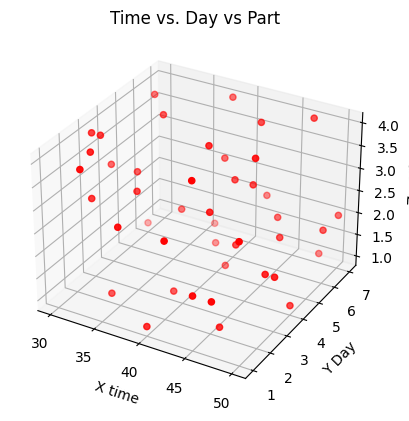

In [84]:
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(y_train,X_train['Day'],X_train['Part'], c='r', marker='o')

# Set axis labels
ax.set_xlabel('X time')
ax.set_ylabel('Y Day')
ax.set_zlabel('Z part')
plt.title('Time vs. Day vs Part')
# Show the plot
# plt.show()


In [85]:
class PoissonRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.n_iterations):
            y_pred = np.exp(np.dot(X, self.theta))
            gradient = np.dot(X.T, (y - y_pred))
            self.theta -= self.learning_rate * gradient
    def predict(self, X):
        y_pred = np.exp(np.dot(X, self.theta))
        return y_pred

In [86]:
model_P = PoissonRegression()
params = model_P.fit(X_train, y_train)
y_pred_P = model_P.predict(X_test)

In [87]:
predicted_Bins_P = np.round(y_pred_P)
accuracy_P = accuracy_score(y_test, predicted_Bins_P)
accuracy_P

0.0

In [88]:
r2 = r2_score(y_test,y_pred_P)
r2

-44.3369183040331

In [89]:
mse = mean_squared_error(y_test,y_pred_P)

In [90]:
mse

1522.25

In [91]:
model = LinearRegression()
train = data.sample(frac=0.8,random_state = 5)
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
predicted_Bins = np.round(y_pred)
accuracy = accuracy_score(y_test, predicted_Bins)
accuracy

0.0

In [94]:
r2 = r2_score(y_test,y_pred)
r2

-0.11309366390599984

In [95]:
mse = mean_squared_error(y_test,y_pred)
mse

37.37366572906603